<a href="https://colab.research.google.com/github/nallalaharivijay/Loan-Eligibilty-Prediction/blob/branch-1/Loan_Eligibilty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
loan=pd.read_csv("Loan_Data.csv")

In [ ]:
loan.shape

(614, 13)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
loan['Property_Area'].nunique()

3

In [ ]:
loan['Gender'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Gender, Length: 614, dtype: bool

In [ ]:
loan['Gender'].isnull().sum()

13

In [ ]:
loan.duplicated().sum()

0

To check if there is any similar columns-----loan.duplicated().sum()

In [ ]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
k=(loan['Dependents']=='1').sum()
print(k)

102


In [ ]:
k=(loan['Dependents']=='1')
print(k)

0      False
1       True
2      False
3      False
4      False
       ...  
609    False
610    False
611     True
612    False
613    False
Name: Dependents, Length: 614, dtype: bool


In [ ]:
loan['Education'] = loan['Education'].str.lower()  # Convert to lowercase
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,not graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan['Gender'].replace('', np.nan,inplace=True)

In [ ]:
loan['Gender'].fillna('MAle',inplace=True)

In [ ]:
loan['Gender'].unique()

array(['Male', 'Female', 'MAle'], dtype=object)

In [ ]:
loan['Gender'].replace('MAle','Male', inplace=True)

In [ ]:
loan['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
loan['LoanAmount'].isna().sum()

22

In [ ]:
x=int(loan['LoanAmount'].mean())
print(x)

146


In [ ]:
loan['LoanAmount'].fillna(x,inplace=True)

In [ ]:
loan['LoanAmount'].isna().sum()

0

In [ ]:
loan['Married'].replace('',np.nan,inplace=True)

In [ ]:
w=loan['Married'].value_counts()
print(w)

Yes    398
No     213
Name: Married, dtype: int64


In [ ]:
m=w.idxmax()
print(m)

Yes


In [ ]:
loan['Married'].fillna(m,inplace=True)

In [ ]:
loan['Married'].isna().sum()

0

In [ ]:
loan['Gender'].isna().sum()

0

In [ ]:
loan['Dependents'].isna().sum()

15

In [ ]:
p=loan['Dependents'].value_counts()
print(p)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [ ]:
q=p.idxmax()
print(q)

0


In [ ]:
loan['Dependents'].fillna(q,inplace=True)

In [ ]:
loan['Dependents'].isna().sum()

0

In [ ]:
loan['Education'].isna().sum()

0

In [ ]:
loan['Loan_Amount_Term'].fillna(360,inplace=True)

In [ ]:
loan['Loan_Amount_Term'].isna().sum()

0

In [ ]:
loan['Property_Area'].isna().sum()

0

In [ ]:
loan['Loan_Status'].isna().sum()

0

In [ ]:
loan['CoapplicantIncome'].isna().sum()

0

In [ ]:
loan['ApplicantIncome'].isna().sum()

0

In [ ]:
loan['Self_Employed'].isna().sum()

32

In [ ]:
v=loan['Self_Employed'].value_counts()
print(v)

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [ ]:
b=v.idxmax()
loan['Self_Employed'].fillna(b,inplace=True)

In [ ]:
loan['Self_Employed'].isna().sum()

0

In [ ]:
loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
condition = (loan['Self_Employed'] == 'No') & (loan['Credit_History'].isna())
loan.loc[condition,'Credit_History']=0

In [ ]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       7
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
condition2 = (loan['Self_Employed'] == 'Yes') & (loan['Credit_History'].isna())
loan.loc[condition2,'Credit_History']=1

In [ ]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

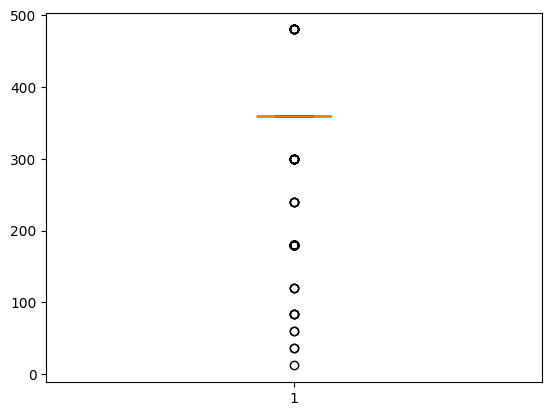

In [ ]:
plt.boxplot(loan['Loan_Amount_Term'])
plt.show()

In [ ]:
loan=loan[loan['Loan_Amount_Term']<=360]

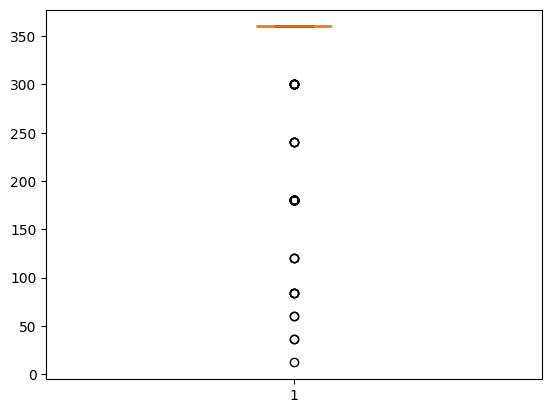

In [ ]:
plt.boxplot(loan['Loan_Amount_Term'])
plt.show()

In [ ]:
loan.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,not graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
loan['Gender']=encoder.fit_transform(loan['Gender'])
loan['Married']=encoder.fit_transform(loan['Married'])
loan['Dependents']=encoder.fit_transform(loan['Dependents'])
loan['Education']=encoder.fit_transform(loan['Education'])
loan['Self_Employed']=encoder.fit_transform(loan['Self_Employed'])
loan['Property_Area']=encoder.fit_transform(loan['Property_Area'])
loan['Loan_Status']=encoder.fit_transform(loan['Loan_Status'])

In [ ]:
loan.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
loan['Dependents'].replace('3+',4,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x=loan.drop(columns=['Loan_Status'])
y=loan['Loan_Status']
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 599, dtype: int64

In [ ]:
x

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=22, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
s=[]
for i in range(3,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  pred=knn.predict(xtest)
  g=accuracy_score(ytest,pred)
  s.append(g)

In [ ]:
s

[0.7166666666666667,
 0.6888888888888889,
 0.7444444444444445,
 0.7444444444444445,
 0.7277777777777777,
 0.7277777777777777,
 0.7277777777777777,
 0.7277777777777777,
 0.7277777777777777,
 0.7222222222222222,
 0.7222222222222222,
 0.7277777777777777]

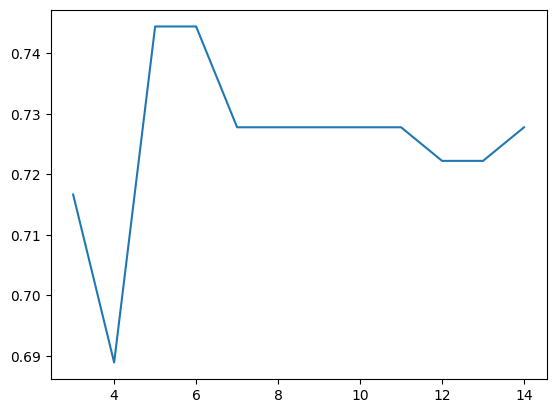

In [ ]:
plt.plot(range(3,15),s)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logi=LogisticRegression()
logi.fit(xtrain,ytrain)
pred=logi.predict(xtest)
c=accuracy_score(ytest,pred)
c

0.7333333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)
d=accuracy_score(ytest,pred)
d

0.6166666666666667

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RA = RandomForestClassifier()
RA.fit(xtrain,ytrain)
pred=RA.predict(xtest)
R=accuracy_score(ytest,pred)
R

0.7166666666666667

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SV = SVC()
SV.fit(xtrain,ytrain)
pred=SV.predict(xtest)
S=accuracy_score(ytest,pred)
S

0.7333333333333333